In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [2]:
cal_vanilla = pyuvdata.UVCal()
cal_vanilla.read_calfits('/Users/ruby/Astro/caltest_Mar31/vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
cal_dw.read_calfits('/Users/ruby/Astro/caltest_Mar31/wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


In [9]:
def plot_gains_per_freq(cal):
    for ant_ind in range(cal.Nants_data):
        plt.plot(np.squeeze(cal.freq_array)/1e6, np.abs(cal.gain_array[ant_ind,0,:,0,0]))
        plt.xlim([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6])
        plt.ylim([1-.08,1+.08])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
    plt.show()
    
def plot_gains_per_freq_diff(cal_1, cal_2):
    for ant_ind in range(cal_1.Nants_data):
        plot_diff = np.abs(cal_1.gain_array[ant_ind,0,:,0,0]-1) - np.abs(cal_2.gain_array[ant_ind,0,:,0,0]-1)
        plt.plot(np.squeeze(cal_1.freq_array)/1e6, plot_diff)
        plt.xlim([np.min(cal_1.freq_array)/1e6, np.max(cal_1.freq_array)/1e6])
        plt.ylim([-.04,.04])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal_1.freq_array)/1e6, np.max(cal_1.freq_array)/1e6], [0,0], color='white', linestyle='--', linewidth=0.9)
    plt.show()
    
def plot_gains_delay(cal):
    delay_array = np.fft.fftfreq(cal.Nfreqs, d=cal.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    for ant_ind in range(cal.Nants_data):
        gains_fft = np.fft.fftshift(np.fft.fft(cal.gain_array[ant_ind,0,:,0,0]-1))
        plt.plot(delay_array, np.abs(gains_fft))
    plt.ylim([0,5])
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.show()
    
def plot_gains_delay_diff(cal_1, cal_2):
    delay_array = np.fft.fftfreq(cal_1.Nfreqs, d=cal_1.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    for ant_ind in range(cal_1.Nants_data):
        gains_fft_1 = np.fft.fftshift(np.fft.fft(cal_1.gain_array[ant_ind,0,:,0,0]-1))
        gains_fft_2 = np.fft.fftshift(np.fft.fft(cal_2.gain_array[ant_ind,0,:,0,0]-1))
        gains_fft_diff = np.abs(gains_fft_1)-np.abs(gains_fft_2)
        plt.plot(delay_array, gains_fft_diff)
    plt.plot([np.min(delay_array), np.max(delay_array)], [0, 0], color='white', linestyle='--', linewidth=0.9)
    plt.ylim([-2,2])
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.show()

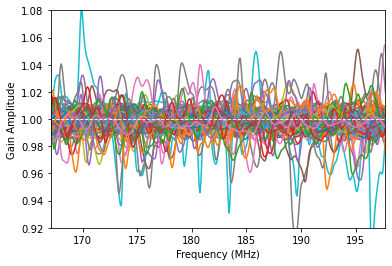

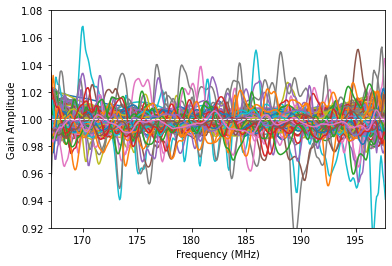

In [10]:
plot_gains_per_freq(cal_vanilla)
plot_gains_per_freq(cal_dw)

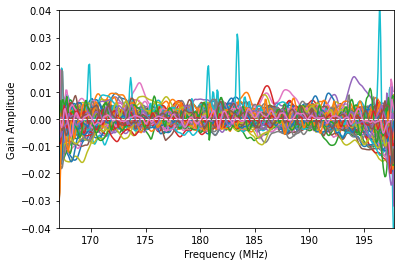

In [11]:
plot_gains_per_freq_diff(cal_vanilla, cal_dw)

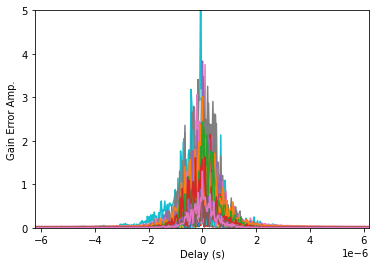

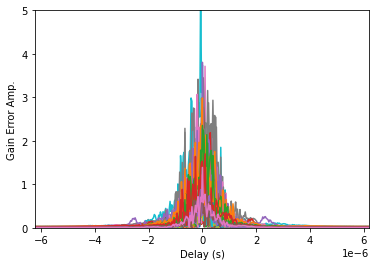

In [5]:
plot_gains_delay(cal_vanilla)
plot_gains_delay(cal_dw)

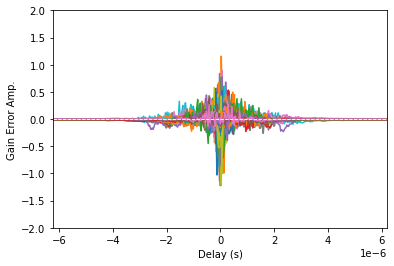

In [6]:
plot_gains_delay_diff(cal_vanilla, cal_dw)